In [1]:
#import the libraries
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px


In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

Import dataset

In [3]:
#reading the dataset
df = pd.read_csv('cardekho_dataset.csv', index_col = [0])

In [4]:
#top 5 dataset
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [19]:
#columns of dataset
df.columns
for i in df.columns:
    print('>',i)

> car_name
> brand
> model
> vehicle_age
> km_driven
> seller_type
> fuel_type
> transmission_type
> mileage
> engine
> max_power
> seats
> selling_price


In [6]:
#bottom 5 of dataset
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [7]:
#random sample of dataset
df.sample(7)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
2865,Maruti Swift,Maruti,Swift,3,35000,Individual,Petrol,Automatic,21.21,1197,81.80,5,600000
6086,Tata Nexon,Tata,Nexon,3,30000,Individual,Petrol,Manual,17.00,1198,108.50,5,750000
157,Volkswagen Polo,Volkswagen,Polo,6,46000,Dealer,Petrol,Manual,16.47,1198,74.00,5,455000
12440,Mercedes-Benz C-Class,Mercedes-Benz,C-Class,2,24300,Dealer,Petrol,Automatic,11.90,1950,201.15,5,3775000
18781,Hyundai Grand,Hyundai,Grand,5,45000,Dealer,Petrol,Manual,18.90,1197,82.00,5,550000
10646,Tata Tiago,Tata,Tiago,3,25000,Individual,Petrol,Manual,23.84,1199,84.00,5,450000
3433,Maruti Wagon R,Maruti,Wagon R,6,40000,Individual,Petrol,Automatic,20.51,998,67.04,5,450000


In [8]:
df.shape

(15411, 13)

In [9]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
df.max_power = df.max_power.apply(lambda x: int(x))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  int64  
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.6+ MB


In [12]:
df['mileage'].value_counts().reset_index().sort_values('index')

,index,mileage
395,4.00,1
409,6.00,1
338,7.50,2
268,7.81,6
406,7.94,1
...,...,...
182,31.79,16
311,32.26,4
200,32.52,13
196,33.44,14


In [21]:
df.to_csv

<bound method NDFrame.to_csv of               car_name     brand     model  vehicle_age  km_driven  \
0          Maruti Alto    Maruti      Alto            9     120000   
1        Hyundai Grand   Hyundai     Grand            5      20000   
2          Hyundai i20   Hyundai       i20           11      60000   
3          Maruti Alto    Maruti      Alto            9      37000   
4        Ford Ecosport      Ford  Ecosport            6      30000   
...                ...       ...       ...          ...        ...   
19537      Hyundai i10   Hyundai       i10            9      10723   
19540    Maruti Ertiga    Maruti    Ertiga            2      18000   
19541      Skoda Rapid     Skoda     Rapid            6      67000   
19542  Mahindra XUV500  Mahindra    XUV500            5    3800000   
19543       Honda City     Honda      City            2      13000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
0      Individual    Petrol            Manual    1

In [22]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 7 numerical features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
we have 6 categorical features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [23]:
type(numerical_features)

list

In [24]:
for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print('---------------------------------------------')

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
---------------------------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mi

# Univariate Analysis

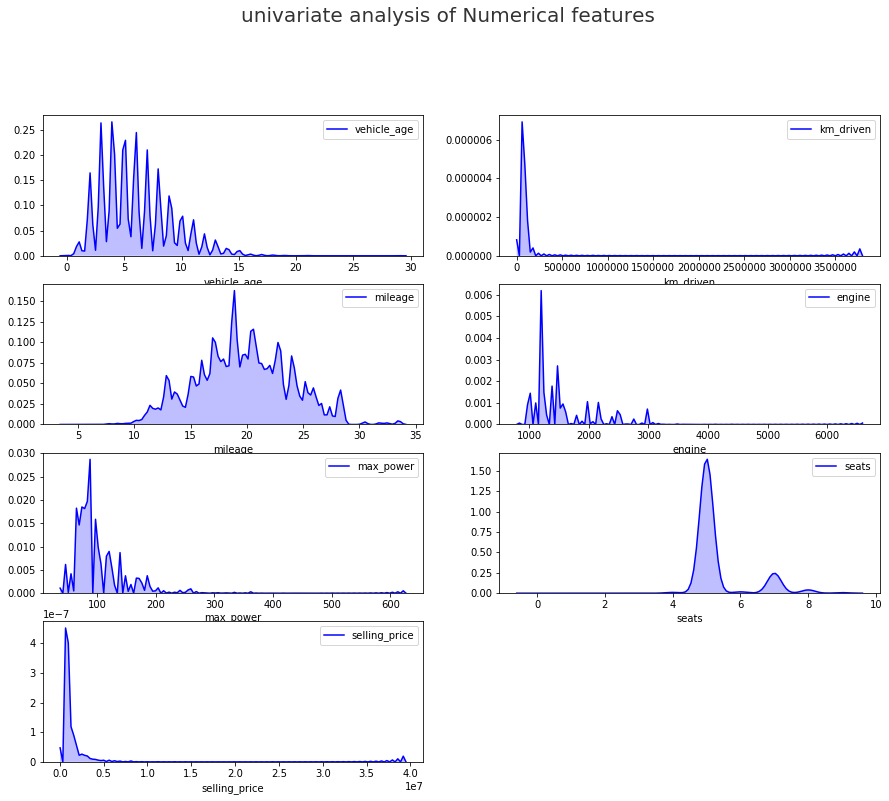

In [25]:
#numerical columns
plt.figure(figsize = (15, 15))
plt.suptitle('univariate analysis of Numerical features', fontsize = 20, fontweight = 20, alpha = 0.8)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(data=df[numerical_features[i]], shade=True, color='b', bw = 0.2)
    plt.xlabel(numerical_features[i])
    plt.tight_layout
    

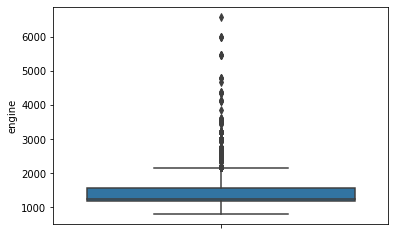

In [26]:
sns.boxplot(y =df['engine'])
plt.show()

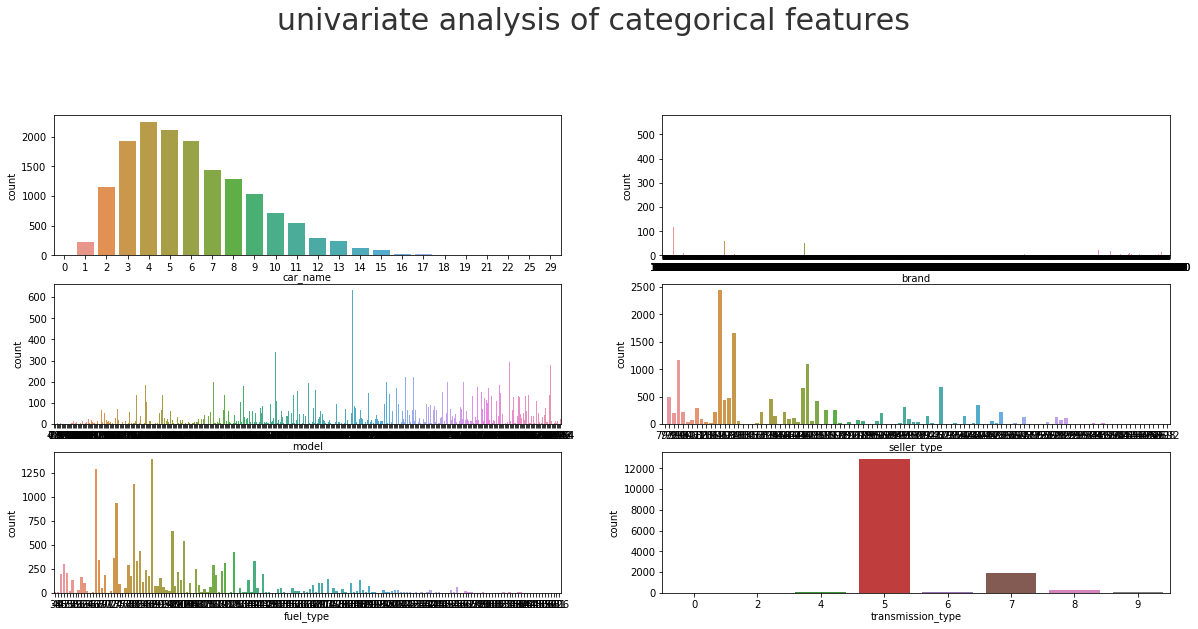

In [27]:
#categorical columns
plt.figure(figsize = (20, 15))
plt.suptitle('univariate analysis of categorical features', fontsize = 30, fontweight = 20, alpha = 0.8)
for i in range(0, len(categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[numerical_features[i]])
    plt.xlabel(categorical_features[i], labelpad = 1)
    plt.tight_layout

# Multivariate Analysis

In [ ]:
df[(list(df.columns))].corr()

In [ ]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr()*100, cmap = 'CMRmap', annot = True)
plt.show()

In [ ]:
df.isnull().sum()